In [2]:
import pandas as pd
import numpy as np
fns=['./data/oawiki.csv','./data/sbertDf.csv','./data/mpnetDf.csv']
modelNames=['OpenAI (ada02)','SBERT','MPNet']

openAI=pd.read_csv(fns[0])
openAI['content_vector'] = openAI['content_vector'].apply(lambda x: np.fromstring(x[1:-1], sep=','))

sbert=pd.read_csv(fns[1])
sbert['content_vector'] = sbert['content_vector'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))

mpnet=pd.read_csv(fns[2])
mpnet['content_vector'] = mpnet['content_vector'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))
dfs=[openAI,sbert,mpnet]

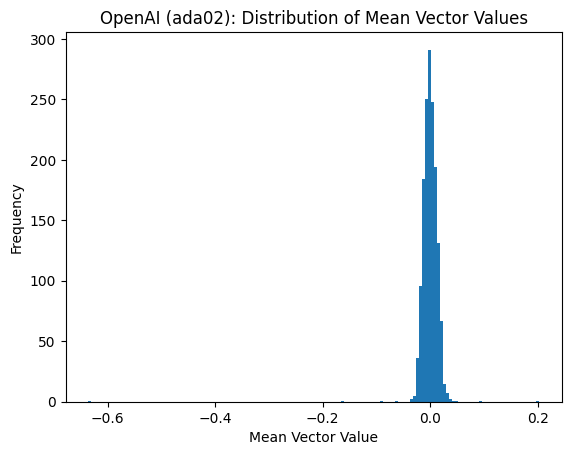

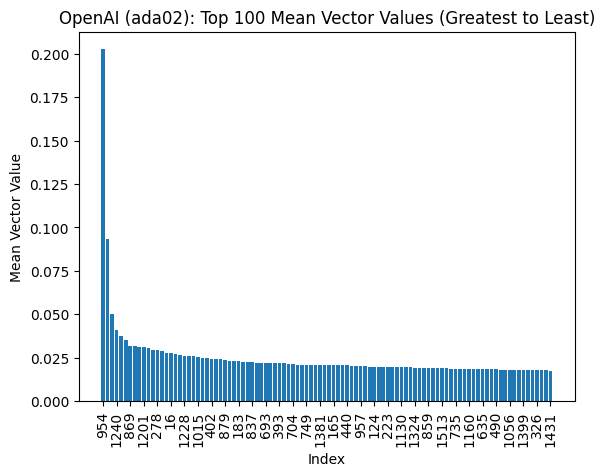

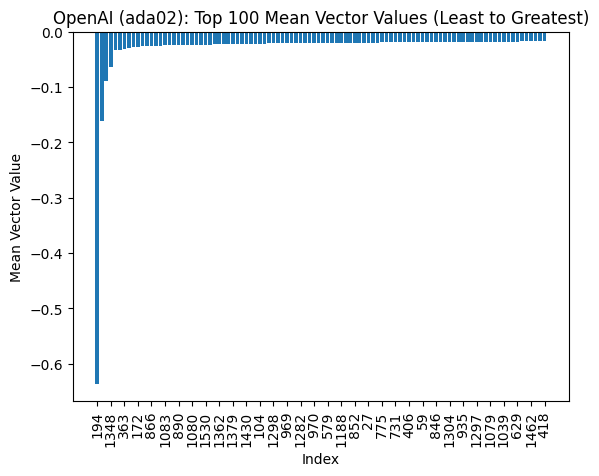

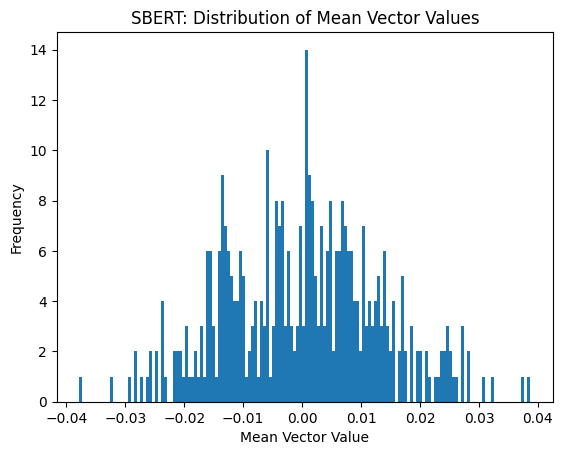

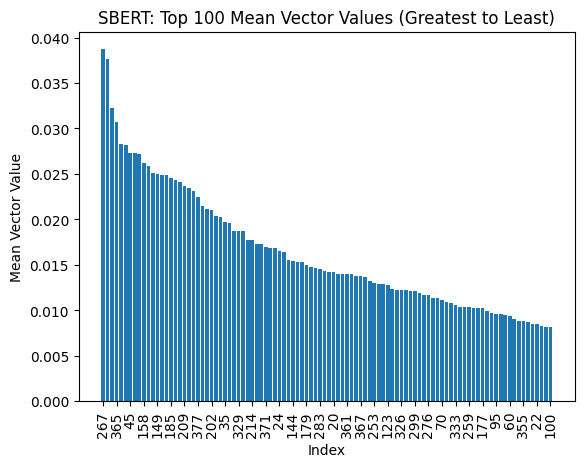

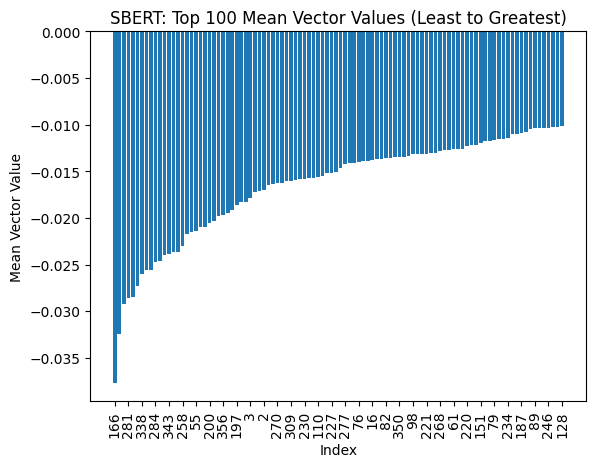

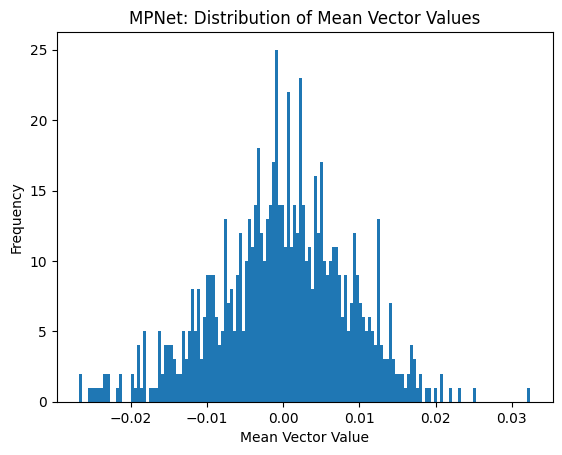

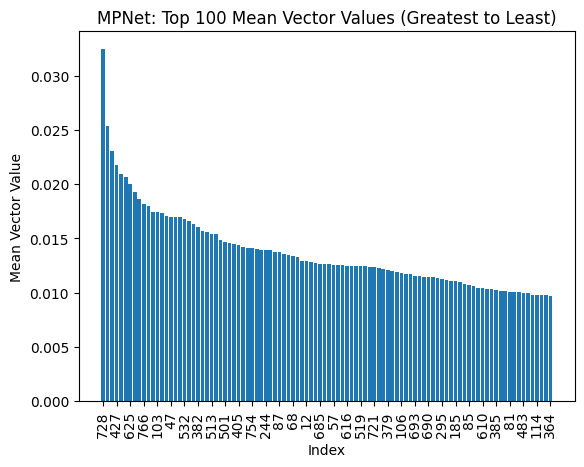

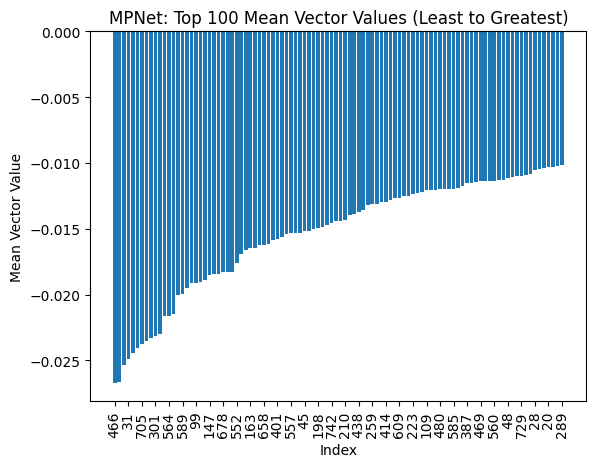

In [3]:
for i,df in enumerate(dfs):
    #create an array of all the vectors
    vectors = np.array(df['content_vector'].tolist())

    #find the mean of all the vectors
    mean_vector = np.mean(vectors, axis=0)
    #label each position of the mean vector with its corresponding index. Sort the list (keeping track of the index) by mean value, and make a histogram of all the mean values to show the distribution of the mean values
    mean_vector_index = [(i, mean_vector[i]) for i in range(len(mean_vector))]
    mean_vector_index_sorted = sorted(mean_vector_index, key=lambda x: x[1])
    mean_vector_sorted = [x[1] for x in mean_vector_index_sorted]
    import matplotlib.pyplot as plt
    plt.hist(mean_vector_sorted, bins=150)
    plt.title(f'{modelNames[i]}: Distribution of Mean Vector Values')
    plt.xlabel("Mean Vector Value")
    plt.ylabel("Frequency")
    plt.show()

    #get the value of the mean vector, sort by greatest to least, as well as least to greatest, plot the top 100 mean values in a bar graph
    # Sort the mean vector indices from greatest to least
    mean_vector_index_sorted_descending = sorted(mean_vector_index, key=lambda x: x[1], reverse=True)

    # Extract the top 100 mean values and their corresponding indices
    top_100_mean_values_descending = [x[1] for x in mean_vector_index_sorted_descending[:100]]
    top_100_indices_descending = [x[0] for x in mean_vector_index_sorted_descending[:100]]

    # Plot the top 100 mean values in a bar graph (greatest to least)
    plt.figure()
    plt.bar(range(100), top_100_mean_values_descending, tick_label=top_100_indices_descending)
    plt.title(f'{modelNames[i]}: Top 100 Mean Vector Values (Greatest to Least)')
    plt.xlabel("Index")
    plt.ylabel("Mean Vector Value")
    plt.xticks(range(0, 100, 3), rotation=90)
    plt.show()

    # Sort the mean vector indices from least to greatest
    mean_vector_index_sorted_ascending = sorted(mean_vector_index, key=lambda x: x[1])

    # Extract the top 100 mean values and their corresponding indices
    top_100_mean_values_ascending = [x[1] for x in mean_vector_index_sorted_ascending[:100]]
    top_100_indices_ascending = [x[0] for x in mean_vector_index_sorted_ascending[:100]]

    # Plot the top 100 mean values in a bar graph (least to greatest)
    plt.figure()
    plt.bar(range(100), top_100_mean_values_ascending, tick_label=top_100_indices_ascending)
    plt.title(f'{modelNames[i]}: Top 100 Mean Vector Values (Least to Greatest)')
    plt.xlabel("Index")
    plt.ylabel("Mean Vector Value")
    plt.xticks(range(0, 100, 3), rotation=90)
    plt.show()


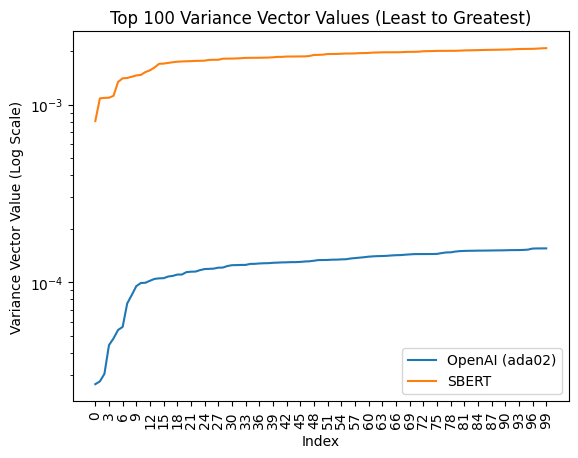

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming dfs is a list of DataFrames and modelNames is a list of model names
for i, df in enumerate(dfs[0:2]):
    # Assuming each DataFrame has a column 'content_vector' containing the vectors
    vectors = np.array(df['content_vector'].tolist())

    # Calculate the variance of all the vectors
    variance_vector = np.var(vectors, axis=0)

    # Label each position of the variance vector with its corresponding index
    variance_vector_index = [(j, variance_vector[j]) for j in range(len(variance_vector))]

    # Sort the variance vector indices from least to greatest
    variance_vector_index_sorted_ascending = sorted(variance_vector_index, key=lambda x: x[1])

    # Extract the top 100 variance values and their corresponding indices
    top_100_variance_values_ascending = [x[1] for x in variance_vector_index_sorted_ascending[:100]]
    top_100_indices_ascending = [x[0] for x in variance_vector_index_sorted_ascending[:100]]

    plt.plot(range(100), top_100_variance_values_ascending,label=f'{modelNames[i]}')
    plt.xlabel("Index")
    plt.ylabel("Variance Vector Value (Log Scale)")
    plt.xticks(range(0, 100, 3), rotation=90)
    plt.yscale('log')

plt.title("Top 100 Variance Vector Values (Least to Greatest)")
plt.legend()
plt.show()
